In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fl_raw = pd.read_csv("../sampleToAnalyse_copy_tk.csv")

In [3]:
for i in fl_raw.columns:
    print (i)

SAMPLEID
DOB
AGE_AT_COLLECTION
GENDER
LOCATION
ADMIT_DIAG
ACCESSION
ORDERING_DOC
ORDERABLE
DTA
REP_PRIORITY
RESULT_TYPE
RESULT
RESULT_STATUS
RESULT_FLAG
RESULT_UNITS
ORDER_DT
DRAWN_DT
REC_DT
COMP_DT
TAT_O2D
TAT_D2R
TAT_O2C
TAT_D2C
TAT_R2C
TECH
INSTRUMENT
PPID_OVERRIDE
PPID_COLLECTION
PAID_OVERRIDE
PAID_COLLECTION
LANGUAGE
NATIONALITY
RACE
ASSOCIATED_DIAGNOSIS


In [8]:
fl_raw

,SAMPLEID,DOB,AGE_AT_COLLECTION,GENDER,LOCATION,ADMIT_DIAG,ACCESSION,ORDERING_DOC,ORDERABLE,DTA,...,TECH,INSTRUMENT,PPID_OVERRIDE,PPID_COLLECTION,PAID_OVERRIDE,PAID_COLLECTION,LANGUAGE,NATIONALITY,RACE,ASSOCIATED_DIAGNOSIS
0,057-847-0,18/08/2014 0:00,3 Years,Male,Allergy Immun,NaN,01-18-091-00177,"Fuleihan, Ramsay (ID 22737)","Allergen, Cow's Milk",Cow Milk,...,MKARIM,SD Phadia A,LELGACEUR,NaN,NaN,LELGACEUR,NaN,Bangladeshi,Non National,Atopic dermatitis
1,082-354-0,16/06/2010 0:00,7 Years,Male,Pulmonology,NaN,01-18-091-00314,"Tuffaha, Amjad (ID 22679)","Allergen, Almond",Almond,...,MKARIM,SD Phadia A,NaN,LBANDERADA,NaN,LBANDERADA,NaN,Qatari,National,Asthma
2,082-354-1,16/06/2010 0:00,7 Years,Male,Pulmonology,NaN,01-18-091-00314,"Tuffaha, Amjad (ID 22679)","Allergen, Cod",Cod,...,MKARIM,SD Phadia A,NaN,LBANDERADA,NaN,LBANDERADA,NaN,Qatari,National,Asthma
3,082-354-2,16/06/2010 0:00,7 Years,Male,Pulmonology,NaN,01-18-091-00314,"Tuffaha, Amjad (ID 22679)","Allergen, Cow's Milk",Cow Milk,...,MKARIM,SD Phadia A,NaN,LBANDERADA,NaN,LBANDERADA,NaN,Qatari,National,Asthma
4,083-341-0,18/06/2012 0:00,5 Years,Female,ENT,NaN,01-18-091-00361,"Abdulkader, Faisal (ID 25127)","Allergen, Almond",Almond,...,MKARIM,SD Phadia A,HGHALLEB,NaN,NaN,HGHALLEB,NaN,Jordanian,Non National,Allergic rhinitis


In [14]:
s_name = []
for i in fl_raw.index:
    _s = fl_raw.loc[i,'SAMPLEID'].split("-")
    if len(_s) >2:
        s_name.append("-".join(_s[:2]))
    else:
        s_name.append(_s[0])

In [13]:
"-".join(_s[:2])

'057-847'

In [15]:
fl_raw['sid'] = s_name

In [27]:
sid_u = fl_raw[['sid','NATIONALITY','RACE']].drop_duplicates(subset='sid')

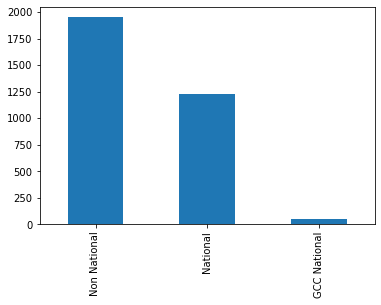

In [29]:
sid_u['RACE'].value_counts().plot(kind="bar")

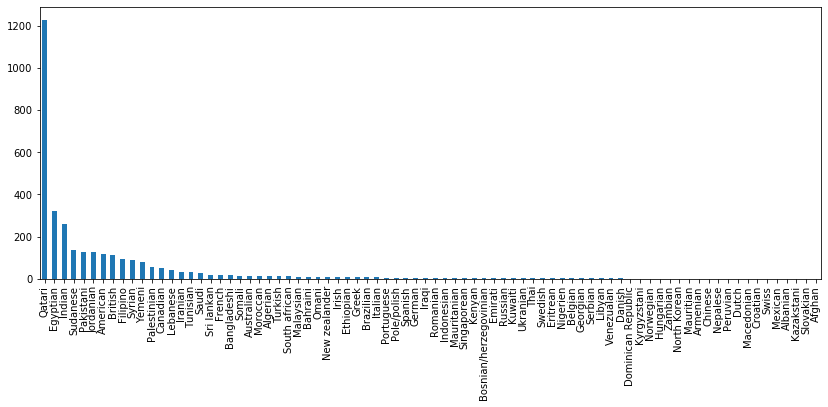

In [32]:
sid_u['NATIONALITY'].value_counts().plot(kind="bar",figsize=(14,5))

In [40]:
_monthIdx = fl_raw[fl_raw.AGE_AT_COLLECTION.str.contains("Month")].index
_yrIDX =  fl_raw[fl_raw.AGE_AT_COLLECTION.str.contains("Year")].index

In [42]:
for i in _monthIdx:
    _a = float(fl_raw.loc[i]['AGE_AT_COLLECTION'].rstrip("Months"))
    fl_raw.loc[i,'Age'] = _a/12
    

In [44]:
for i in _yrIDX:
    _a = float(fl_raw.loc[i]['AGE_AT_COLLECTION'].rstrip("Years"))
    fl_raw.loc[i,'Age'] = _a

In [50]:
fl_raw.Age = fl_raw.Age.astype('float')

/Users/tkhan/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/tkhan/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/tkhan/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/tkhan/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x131f6ef60>,
 'caps': [<matplotlib.lines.Line2D at 0x133bf2588>,
 'boxes': [<matplotlib.lines.Line2D at 0x131f6ee10>],
 'medians': [<matplotlib.lines.Line2D at 0x133bf2c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x133bf2f60>],
 'means': []}

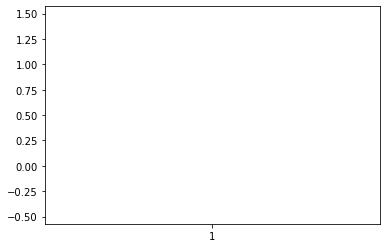

In [58]:
plt.boxplot(fl_raw.Age.values)

In [52]:
fl_raw.Age.describe()

count    41370.000000
mean         6.119027
std          7.723442
min          0.083333
25%          1.833333
50%          4.000000
75%          8.000000
max         65.000000
Name: Age, dtype: float64

In [59]:
fl_raw.ASSOCIATED_DIAGNOSIS.value_counts().to_csv("./allergen_Group.csv")

/Users/tkhan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


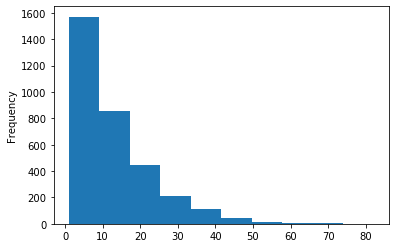

In [27]:
fl_raw.sid.value_counts().plot(kind="hist")

In [31]:
fl_raw.sid.value_counts().head()

079-515    82
089-054    73
100-907    70
130-488    69
092-839    67
Name: sid, dtype: int64

In [36]:
fl_raw[fl_raw.sid=="079-515"]

,SAMPLEID,DOB,AGE_AT_COLLECTION,GENDER,LOCATION,ADMIT_DIAG,ACCESSION,ORDERING_DOC,ORDERABLE,DTA,...,INSTRUMENT,PPID_OVERRIDE,PPID_COLLECTION,PAID_OVERRIDE,PAID_COLLECTION,LANGUAGE,NATIONALITY,RACE,ASSOCIATED_DIAGNOSIS,sid
1875,079-515-0,21/03/2017 0:00,15 Months,Male,Allergy Immun,NaN,01-18-189-00610,"Fuleihan, Ramsay (ID 22737)","Allergen, Almond",Almond,...,SD Phadia A,RFEKIHSALE,NaN,RFEKIHSALE,NaN,Arabic,Qatari,National,Food allergy,079-515
1876,079-515-1,21/03/2017 0:00,15 Months,Male,Allergy Immun,NaN,01-18-189-00610,"Fuleihan, Ramsay (ID 22737)","Allergen, Brazilnut",Brazilnut,...,SD Phadia A,RFEKIHSALE,NaN,RFEKIHSALE,NaN,Arabic,Qatari,National,Food allergy,079-515
1877,079-515-2,21/03/2017 0:00,15 Months,Male,Allergy Immun,NaN,01-18-189-00610,"Fuleihan, Ramsay (ID 22737)","Allergen, Cashew",Cashew,...,SD Phadia A,RFEKIHSALE,NaN,RFEKIHSALE,NaN,Arabic,Qatari,National,Food allergy,079-515
1878,079-515-3,21/03/2017 0:00,15 Months,Male,Allergy Immun,NaN,01-18-189-00610,"Fuleihan, Ramsay (ID 22737)","Allergen, Chick pea",Chick pea,...,SD Phadia A,RFEKIHSALE,NaN,RFEKIHSALE,NaN,Arabic,Qatari,National,Food allergy,079-515
1879,079-515-4,21/03/2017 0:00,15 Months,Male,Allergy Immun,NaN,01-18-189-00610,"Fuleihan, Ramsay (ID 22737)","Allergen, Coconut",Coconut,...,SD Phadia A,RFEKIHSALE,NaN,RFEKIHSALE,NaN,Arabic,Qatari,National,Food allergy,079-515
4561,079-515-5,21/03/2017 0:00,20 Months,Male,Dermatology,NaN,01-18-332-00884,"Fuleihan, Ramsay (ID 22737)","Allergen, Almond",Almond,...,SD Phadia A,KESPORAS,NaN,NaN,KESPORAS,Arabic,Qatari,National,Food allergy,079-515
4562,079-515-6,21/03/2017 0:00,20 Months,Male,Dermatology,NaN,01-18-332-00884,"Fuleihan, Ramsay (ID 22737)","Allergen, Banana",Banana,...,SD Phadia A,KESPORAS,NaN,NaN,KESPORAS,Arabic,Qatari,National,Food allergy,079-515
4563,079-515-7,21/03/2017 0:00,20 Months,Male,Dermatology,NaN,01-18-332-00884,"Fuleihan, Ramsay (ID 22737)","Allergen, Cacao/Cocoa",Cacao/Cocoa,...,SD Phadia A,KESPORAS,NaN,NaN,KESPORAS,Arabic,Qatari,National,Food allergy,079-515
4564,079-515-8,21/03/2017 0:00,20 Months,Male,Dermatology,NaN,01-18-332-00884,"Fuleihan, Ramsay (ID 22737)","Allergen, Carrot",Carrot,...,SD Phadia A,KESPORAS,NaN,NaN,KESPORAS,Arabic,Qatari,National,Food allergy,079-515
4565,079-515-9,21/03/2017 0:00,20 Months,Male,Dermatology,NaN,01-18-332-00884,"Fuleihan, Ramsay (ID 22737)","Allergen, Cashew",Cashew,...,SD Phadia A,KESPORAS,NaN,NaN,KESPORAS,Arabic,Qatari,National,Food allergy,079-515
